In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
from sklearn.datasets import fetch_openml

In [22]:
mnist = fetch_openml("mnist_784", version=1)

In [23]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [24]:
x,y = mnist["data"],mnist["target"]

In [25]:
x.shape

(70000, 784)

In [26]:
y[0]

'5'

In [27]:
y.shape

(70000,)

In [28]:
import matplotlib as  mpl

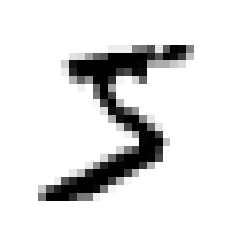

In [29]:
some_digit = x[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [30]:
y[0]

'5'

In [31]:
y = y.astype(np.uint8)

In [32]:
y

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

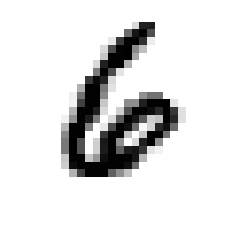

In [33]:
some_digit = x[13]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [34]:
y[13]

6

In [35]:
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]

In [36]:
## Training a binary classifier:-

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [37]:
from sklearn.linear_model import SGDClassifier

In [38]:
print(x_train.shape,y_test_5.shape)

(60000, 784) (10000,)


In [39]:
sgd_clf = SGDClassifier(random_state=42)
# model training
sgd_clf.fit(x_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [40]:
sgd_clf.predict([x[13]])

array([False])

# Implementing Cross-Validation

In [41]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [42]:
# not required

In [43]:
skfolds = StratifiedKFold(n_splits=3, random_state=42)


C:\Users\RahulA\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [44]:
for train_index, test_index in skfolds.split(x_train, y_train_5):
    clone_clf = clone(sgd_clf)
    x_train_folds = x_train[train_index]
    y_train_folds = y_train_5[train_index]
    x_test_fold = x_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(x_train_folds, y_train_folds)
    y_pred = clone_clf.predict(x_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    
    print(n_correct / len(y_pred))

0.95035
0.96035
0.9604


In [45]:
from sklearn.model_selection import cross_val_score

In [46]:
cross_val_score(sgd_clf,x_train,y_train_5,cv=3,scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [47]:
### To check another model as another option

In [48]:
from sklearn.base import BaseEstimator

In [49]:
class Never5Classifier(BaseEstimator):
    def fit(self, x, y=None):
        pass
    def predict(self, x):
        return np.zeros((len(x),1),dtype=bool)

In [50]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, x_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

# Confusion matrix:-

In [51]:
from sklearn.model_selection import cross_val_predict

In [52]:
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3)

In [53]:
from sklearn.metrics import confusion_matrix

In [54]:
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [55]:
# FYI, a perfect model should not have any FP and FN cases. It can happens only when predicted = actual.
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [56]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5,y_train_pred)

0.8370879772350012

In [57]:
recall_score(y_train_5,y_train_pred)

0.6511713705958311

In [59]:
## f1_score:-[Harmonic mean of precision and recall]

from sklearn.metrics import f1_score

In [60]:
f1_score(y_train_5,  y_train_pred)

0.7325171197343846